# 데이터프레임 집계

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip =  pd.read_csv(path)

# 확인
tip.head()

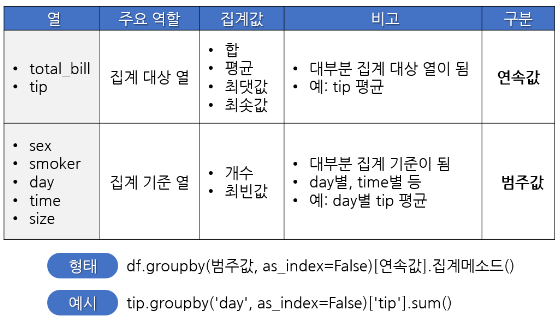

# 1. 합 구하기

##### 1) 열 하나 집계

In [ ]:
# 'total_bill' 합계
tip['total_bill'].sum()

In [ ]:
# total_bill, tip 각각의 합계
tip[['total_bill', 'tip']].sum()

##### 2) 집계하기
- df.groupby(by='', as_index=True)
- 하나의 범주값을 갖는 열별로 합을 구할 때(ex. day별로)
- as_index=True (기본값): 집계 기준이 되는 열이 인덱스 열이 됨

In [ ]:
# day별 tip합계    # as_index=True
tip.groupby(by='day', as_index=True)['tip'].sum()

## 기준 열이 인덱스 열이 됨

In [ ]:
# day별 tip합계    # as_index=False
tip.groupby(by='day', as_index=False)['tip'].sum()

##### 2) 데이터프레임으로 선언

In [ ]:
tip_sum = tip.groupby(by='day', as_index=False)['tip'].sum()
tip_sum

##### 3) 집계 결과 시각화(막대그래프)
- plt.bar(): 세로 막대그래프
- plt.barh(): 가로 막대그래프

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(x=tip_sum['day'], height=tip_sum['tip'])
plt.title('Tips per day', size=20, pad=20)
plt.xlabel('day')
plt.ylabel('count')
plt.legend(['day'])
plt.show()

In [ ]:
# day 별 tip 비교 시각화
plt.figure(figsize=(5,3))
plt.barh(tip['day'], tip['tip'])
plt.show

##### 4) 선 그래프

In [ ]:
# tip 변경 추이 시각화
tip_mean = tip['tip'].mean()

plt.figure(figsize=(5,3))
plt.plot(tip['tip'])
plt.axhline(tip_mean, color='r')
plt.show

In [ ]:
# tip, total_bill 변경 추이 시각화
plt.figure(figsize=(5,3))
plt.plot(tip[['total_bill', 'tip']])    # total_bill, tip 두개 그래프 동시에 표현
plt.legend(['total_bill', 'tip'])
plt.show()

##### 5) 히스토그램

In [ ]:
# tip 분포 시각화(히스토그램)
plt.hist(tip['tip'])
plt.show()

In [ ]:
# total_bill 분포 시각화
plt.hist(tip['total_bill'], bins=20, alpha=0.7, edgecolor='w')
plt.show()

##### 6) 여러 열 집계
- **[ ['total_bill', 'tip'] ].sum()** 형태와 같이 집계 대상 열을 리스트로 지정

In [ ]:
# day별 total_bill, tip 합계 조회
tip.groupby(by='day', as_index=False)[['total_bill', 'tip']].sum()

In [ ]:
# day 별 나머지 열들 합계 조회
tip_sum = tip.groupby(by='day', as_index=False).sum()
tip_sum

In [ ]:
# 기준 by=['day', 'smoker'] 
tip_sum = tip.groupby(by=['day', 'smoker'], as_index=False).sum()
tip_sum

$ $

$ $

# 2. 평균, 최댓값, 최솟값, 개수 구하기
- sum()대신 관련 메소드 적절하게 지정

##### 1) 평균 구하기

In [ ]:
# day별 tip 평균
tip_mean = tip.groupby(by='day', as_index=False)[['tip']].mean()
tip_mean

In [ ]:
# day + sex 별 나머지 모든 열 평균
tip_mean = tip.groupby(by=['day','sex'], as_index=False).mean()
tip_mean

##### 2) 최댓값, 최솟값, 개수 구하기

In [ ]:
# day별 tip 최댓값
tip_max = tip.groupby(by='day', as_index=False)[['tip']].max()

# 확인
tip_max

In [ ]:
# day별 tip 최솟값
tip_min = tip.groupby(by='day', as_index=False)[['tip']].min()

# 확인
tip_min